# Assignment 1.2 - Part B - Joseph Minard's Map

### Name: Sen Yan
### ID: 19315814

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as pch
from matplotlib.collections import LineCollection

In [2]:
#Get the line collection when given the data about the the longitude, latitude and the number of survivors

def LC(data, color):
    x, y = data['LON'].astype('float'), data['LAT'].astype('float')
    w = round(np.exp(data['SURV'].astype('int') / 100000).astype('float'), 2)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    seg = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(seg, linewidths=w,colors=color)
    return(lc)

In [3]:
#Get the position of start point, end point and the width of a line when given data about the longitude, latitude and the number of survivors

def XYW(data):
    x, y = data['LON'].astype('float'), data['LAT'].astype('float')
    w = round(np.exp(data['SURV'].astype('int') / 100000).astype('float'), 2)
    return(x, y, w)

In [4]:
#Get the line collection when given the data about the the longitude and temperature

def LC_TEMP(data):
    x, y = data['LON'].astype('float'), data['TEMP'].astype('float')
    w = 2
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    seg = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(seg, linewidths=w,colors='red')
    return(lc)

In [5]:
# Load and show the data

data = pd.read_excel("minard-data.xlsx")
data.head()

,LONC,LATC,CITY,LONT,TEMP,DAYS,MON,DAY,LONP,LATP,SURV,DIR,DIV
0,24.0,55.0,Kowno,37.6,0.0,6.0,Oct,18.0,24.0,54.9,340000,A,1
1,25.3,54.7,Wilna,36.0,0.0,6.0,Oct,24.0,24.5,55.0,340000,A,1
2,26.4,54.4,Smorgoni,33.2,-9.0,16.0,Nov,9.0,25.5,54.5,340000,A,1
3,26.8,54.3,Molodexno,32.0,-21.0,5.0,Nov,14.0,26.0,54.7,320000,A,1
4,27.7,55.2,Gloubokoe,29.2,-11.0,10.0,NaN,NaN,27.0,54.8,300000,A,1


In [6]:
# Divide the table into three parts named 'city', 'temp', 'surv' seperately

#City
city = np.array([data['CITY'], data['LONC'], data['LATC']]).T
city = pd.DataFrame(city, columns = ['CITY', 'LON', 'LAT'])
city.dropna(axis=0, how='all', inplace=True)

#Temperature
temp = pd.DataFrame(np.array(data.iloc[0:, 3:8]), columns = ['LON', 'TEMP', 'DAYS', 'MON', 'DAY'])
temp.dropna(axis=0, how='all', inplace=True)
temp.iloc[4, 4] = temp.iloc[3, 4] + temp.iloc[4, 2]
temp.iloc[4, 3] = temp.iloc[3, 3]

#Survivors
surv = pd.DataFrame(np.array(data.iloc[0:, 8:]), columns = ['LON', 'LAT', 'SURV', 'DIR', 'DIV'])
surv['DIR'] = surv['DIR'].astype('str')
surv['DIV'] = surv['DIV'].astype('str')

In [7]:
#Define the width and height of the charts

cities_n, cities_x, cities_y = city['CITY'], city['LON'], city['LAT']
print('The range of longitude is [', cities_x.min(), ',',  cities_x.max(), ']',
      '\nAnd the range of latitude is [', cities_y.min(), ',',  cities_y.max(), ']')

surv_x, surv_y = surv['LON'].astype('float'), surv['LAT'].astype('float')
surv_num = surv['SURV'].astype('float')
print('\nThe range of the number of survivors is [',  surv_num.min(), ',', surv_num.max(), ']',
      '\nSo, the range of the width of lines could be set as the "exp{num/4000}".')

temp_t = temp['TEMP'].astype('float')
temp_d = temp_t.astype('int').astype('str') + '℃, ' + temp['MON'].astype('str') + '. ' + temp['DAY'].astype('int').astype('str')
temp_x = temp['LON'].astype('float')

x_min = int(cities_x.min()) - 1
x_max = int(cities_x.max()) + 2
x_range = x_max - x_min
y_min = int(cities_y.min()) - 1
y_max = int(cities_y.max()) +2
y_range = y_max - y_min
t_min = int(temp_t.min()) - 2
t_max = int(temp_t.max()) + 3
t_range = t_max - t_min

The range of longitude is [ 24.0 , 37.6 ] 
And the range of latitude is [ 53.9 , 55.8 ]

The range of the number of survivors is [ 4000.0 , 340000.0 ] 
So, the range of the width of lines could be set as the "exp{num/4000}".


In [8]:
#Divide the data about suvivors into six groups - A1, R1, A2, R2, A3 and R3

A1 = surv[0: 16]
R1 = surv[15: 27]
A2 =  surv[27: 33]
R2 =  surv[32: 43]
A3 =  surv[43:46]
R3 =  surv[45:]

(A1_x, A1_y, A1_w) = XYW(A1)
(R1_x, R1_y, R1_w) = XYW(R1)
(A2_x, A2_y, A2_w) = XYW(A2)
(R2_x, R2_y, R2_w) = XYW(R2)
(A3_x, A3_y, A3_w) = XYW(A3)
(R3_x, R3_y, R3_w) = XYW(R3)

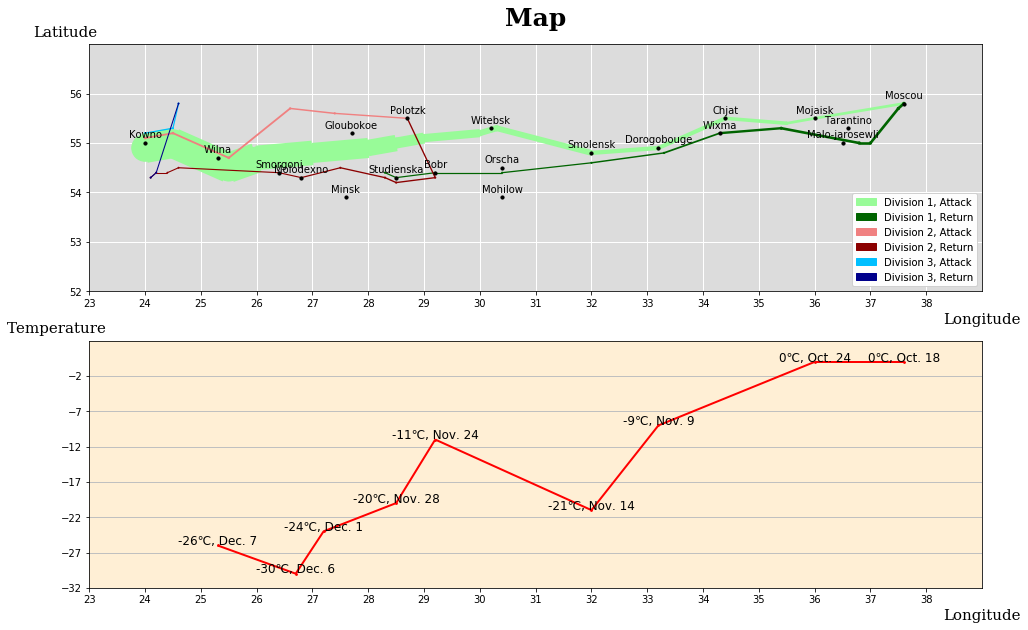

In [9]:
#Draw the charts

fig = plt.figure(figsize=(x_range, 2 * y_range))

#Chart 1 shows the position of cities and path of army through them as well as the number of survivors in the army along the path

ax1 = plt.subplot(211)

cities = []
for i in range(len(cities_n)):
    plt.text(cities_x[i], cities_y[i]+0.1, cities_n[i], ha='center', family='sans-serif', size = 10)

colorA = ['palegreen', 'lightcoral', 'deepskyblue']
colorR = ['darkgreen', 'darkred', 'darkblue']
A1_lc, A2_lc, A3_lc = LC(A1, colorA[0]), LC(A2, colorA[1]), LC(A3, colorA[2])
R1_lc, R2_lc, R3_lc = LC(R1, colorR[0]), LC(R2, colorR[1]), LC(R3, colorR[2])

ax1.add_collection(A1_lc)
plt.scatter(A1_x, A1_y, s = (np.pi*np.square(A1_w/2)), c=colorA[0], zorder = 2)
ax1.add_collection(A2_lc)
plt.scatter(A2_x, A2_y, s = (np.pi*np.square(A2_w/2)), c=colorA[1], zorder = 2)
ax1.add_collection(A3_lc)
plt.scatter(A3_x, A3_y, s = (np.pi*np.square(A3_w/2)), c=colorA[2], zorder = 2)
ax1.add_collection(R1_lc)
plt.scatter(R1_x, R1_y, s = (np.pi*np.square(R1_w/2)), c=colorR[0], zorder = 4)
ax1.add_collection(R2_lc)
plt.scatter(R2_x, R2_y, s = (np.pi*np.square(R2_w/2)), c=colorR[1], zorder = 4)
ax1.add_collection(R3_lc)
plt.scatter(R3_x,R3_y, s = (np.pi*np.square(R3_w/2)), c=colorR[2], zorder = 4)

plt.scatter(cities_x, cities_y, s = 10, c = 'black', zorder = 6)

ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min,y_max)
ax1.set_xlabel('Longitude', fontsize = 15, family = 'serif', fontweight = 'normal', x = 1)
ax1.set_ylabel('Latitude', fontsize = 15, family = 'serif', fontweight = 'normal', y = 1.02, rotation = 'horizontal')
ax1.set_xticks(np.arange(x_min, x_max, 1))
ax1.set_yticks(np.arange(y_min, y_max, 1))
ax1.set_title('Map', fontsize = 25, family = 'serif', fontweight = 'black', x = 0.5, y = 1.05)
ax1.patch.set_facecolor('gainsboro')
plt.grid(True, linestyle = "-", color = "white", linewidth = "1", zorder = 0)

pA1 = pch.Patch(color=colorA[0], label='Division 1, Attack')
pR1 = pch.Patch(color=colorR[0], label='Division 1, Return')
pA2 = pch.Patch(color=colorA[1], label='Division 2, Attack')
pR2 = pch.Patch(color=colorR[1], label='Division 2, Return')
pA3 = pch.Patch(color=colorA[2], label='Division 3, Attack')
pR3 = pch.Patch(color=colorR[2], label='Division 3, Return')
leg1 = ax1.legend(handles = [pA1, pR1, pA2, pR2, pA3, pR3], loc = 'lower right')
ax1.add_artist(leg1)

#Chart 2 show the temperature during retreat

ax2 = plt.subplot(212)

dates = []
for i in range(len(temp_d)):
    plt.text(temp_x[i], temp_t[i]+0.1, temp_d[i], ha='center', family='sans-serif', size = 12)

lc_t = LC_TEMP(temp)

ax2.add_collection(lc_t)
plt.scatter(temp_x, temp_t, s = (np.pi*np.square(1)), c = 'red', zorder = 2)

ax2.set_xlim(x_min, x_max)
ax2.set_ylim(t_min,t_max)
ax2.set_xlabel('Longitude', fontsize = 15, family = 'serif', fontweight = 'normal', x = 1)
ax2.set_ylabel('Temperature', fontsize = 15, family = 'serif', fontweight = 'normal', y = 1.02, rotation = 'horizontal')
ax2.set_xticks(np.arange(x_min, x_max, 1))
ax2.set_yticks(np.arange(t_min, t_max, 5))
ax2.patch.set_facecolor('papayawhip')
plt.grid(axis="y", linestyle = "-", color = "silver", linewidth = "1", zorder = 0)

plt.show()